In [ ]:
"""LCR meter only"""
from Functions_A import *
from Functions_B import *
import datetime
import matplotlib.pyplot as plt
start_runtime = time.time()

# connect to the LCR meter
ser_lcr = DeviceConnect('/dev//cu.usbserial-A94IP9Y2')  # LCR Meter

freq = Frequencies(1*1000, 100*1000, 10) # start, stop, number of points in-between (log spaced) 
# 10 Hz - 100 kHz (2 - 5 in log space) 

# mainReadings = ["R", "C", "L", "Z"]   (Ohm, H, C, Ohm) 
# minorReadings = ["X", "D", "Q", "THR" (θ), "ESR"] (Ohm, None, None, deg, Ohm) 
mainReadings = ['Z'] # can add multiple readings
minorReadings = ['THR'] # can add multiple readings
voltage = 1 # AC voltage (V)
biasVoltage = 0 # DC bias voltage. set to None if no bias is needed. 
numMeasurements = 5 

#chamber v7.3 dimensions
height = 34 # mm
ir = 4.1 # mm
area = np.pi*ir**2 # mm^2     
area = round(area, 2)
thickness = height  # mm
material = 'paraffin wax'


try:    
    # material = input('Material? ')
    params = [material, mainReadings, minorReadings]
    info = f'{area}, Area (mm^2), {thickness}, Thickness (mm), {voltage}, V, n={numMeasurements}'
    dataFrame = Experiment(ser_lcr, freq, mainReadings, minorReadings, voltage, biasVoltage, numMeasurements)

    DataExport(params, dataFrame, info)

except Exception as e:
    print(f'Test Aborted: {e}')
    if 'dataFrame' in locals():
        info = f'{area}, mm^2, {thickness}, mm, {voltage}, V, n={numMeasurements}'
        DataExport(params, dataFrame, info)
        print("!!! Partial data saved.")

finally:
    DeviceDisconnect(ser_lcr)

end_runtime = time.time()
print(f"Total runtime = {round(end_runtime - start_runtime, 2)} seconds")

# LCRCommander(ser_lcr, 'SYST:REM') # remote mode
# LCRCommander(ser_lcr, 'SYST:LOC') # local mode

   Frequency       Z Avg.        Z Std.  Z-THR Avg.  Z-THR Std.
0       1000  150996200.0  1.317629e+06   -89.74782    0.383796
1       1668   95703340.0  2.781278e+07   -90.35772    0.306582
2       2783   54999260.0  1.312488e+07   -90.94504    0.715583
3       4642   33944480.0  7.307817e+06   -91.98752    0.488489
4       7743   20868940.0  4.665154e+06   -93.07228    0.565476
5      12915   12347480.0  3.092418e+06   -94.55780    0.578352
6      21544    7249482.0  1.768711e+06   -96.23210    0.668206
7      35938    4203602.0  1.078775e+06   -97.83984    0.648541
8      59948    2347450.0  6.584101e+05   -98.91618    0.379075
9     100000    1348110.0  3.351701e+05  -100.58038    0.737802
Test completed


Total runtime = 21.88 seconds


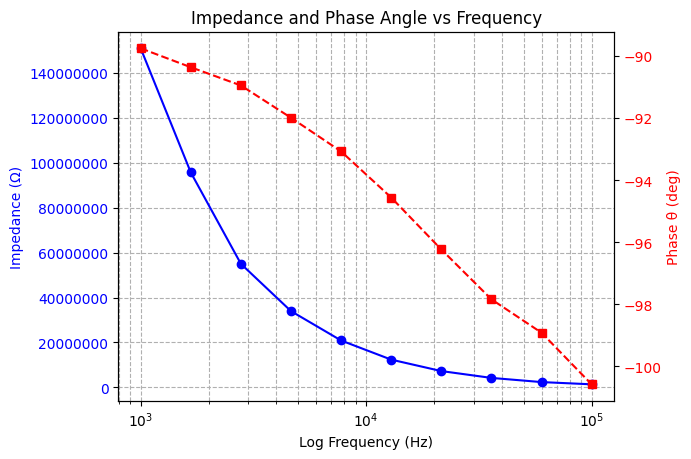

In [2]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.plot(dataFrame['Frequency'], dataFrame['Z Avg.'], marker='o', linestyle='-', color='blue', label='Impedance (Ω)')
ax1.set_xlabel('Log Frequency (Hz)')
ax1.set_ylabel('Impedance (Ω)', color='blue')
ax1.set_xscale('log')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.ticklabel_format(style='plain', axis='y')

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.plot(dataFrame['Frequency'], dataFrame['Z-THR Avg.'], marker='s', linestyle='--', color='red', label='Phase θ (deg)')
ax2.set_ylabel('Phase θ (deg)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.grid(True, which='both', ls='--')
plt.title('Impedance and Phase Angle vs Frequency')
plt.show()

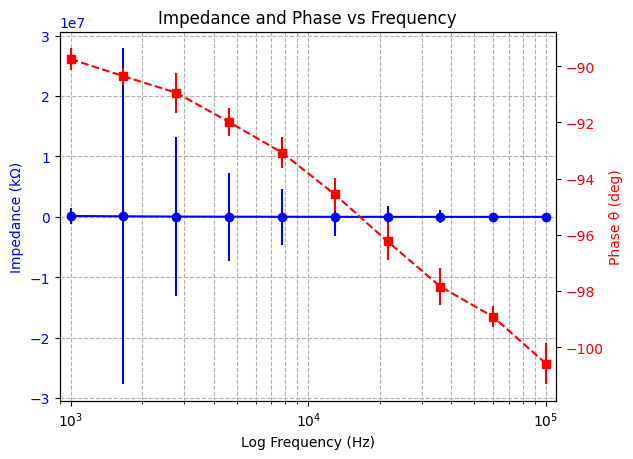

In [4]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.errorbar(
    dataFrame['Frequency'], dataFrame['Z Avg.']/1000, yerr=dataFrame['Z Std.'],
    fmt='o-', color='blue')
ax1.set_xlabel('Log Frequency (Hz)')
ax1.set_ylabel('Impedance (kΩ)', color='blue')
ax1.set_xscale('log')
ax1.set_xlim(freq[0]*0.9, freq[-1]*1.1)
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Frequency'], dataFrame['Z-THR Avg.'], yerr=dataFrame['Z-THR Std.'],
    fmt='s--', color='red')
ax2.set_ylabel('Phase θ (deg)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 
ax1.grid(True, which='both', ls='--')
plt.title('Impedance and Phase vs Frequency')
plt.show()